
### The Use of BERT for Medical Diagnosis with Data Augmentation

The integration of BERT for diagnosis, combined with data augmentation techniques such as backtranslation and paraphrasing, enhances the performance and robustness of the model. The approach involves the following steps:

#### 1. **Data Augmentation**
Data augmentation techniques are crucial for improving model generalization by creating diverse training examples.

- **Backtranslation**:
  Backtranslation is a process where text is first translated into another language (e.g., English to German) and then translated back to English. This generates alternative expressions of the same content while maintaining semantic meaning. By introducing linguistic variations, backtranslation diversifies the training data, making the model more resilient to different phrasings and reducing overfitting.

- **Paraphrasing**:
  Paraphrasing further enriches the dataset by generating new sentences that express the same meaning using different words and structures. This increases the variation in input data and helps the model learn to generalize better across different linguistic patterns.

#### 2. **BERT-Based Model**
BERT (Bidirectional Encoder Representations from Transformers) is a powerful language model that captures contextual relationships in text. It is fine-tuned for medical diagnosis classification tasks, where it predicts disease labels based on symptom descriptions provided in the input text. BERT’s ability to process bidirectional context helps in understanding complex medical terminology and nuances in symptoms, making it highly suitable for medical NLP tasks.

#### 3. **Workflow**

- **Dataset Preparation**:
  Symptom descriptions and corresponding disease labels are collected and preprocessed to ensure consistency and quality.

- **Augmentation**:
  Backtranslation and paraphrasing techniques are applied to expand the dataset, addressing issues such as data scarcity and improving the model's ability to generalize.

- **Fine-Tuning**:
  The augmented dataset is used to fine-tune the BERT model, optimizing performance on classification metrics such as accuracy and F1-score.

#### 4. **Applications**
This methodology enhances diagnostic accuracy by leveraging diverse linguistic inputs, making it particularly valuable in medical NLP. It supports the identification of diseases based on symptom descriptions, improving the model’s capability to make accurate predictions in a clinical setting.

---



In [5]:
import requests

# URL of the file
url = "https://raw.githubusercontent.com/mohammad95labbaf/BERT_Medical_Diagnosis/main/Symptom2Disease.csv"

# Send a GET request to download the file
response = requests.get(url)

# Save the file to the local system
with open("Symptom2Disease.csv", "wb") as file:
    file.write(response.content)

print("File downloaded successfully!")
import pandas as pd
import numpy as np

df = pd.read_csv('Symptom2Disease.csv')

# Display the DataFrame
df.head(20)

File downloaded successfully!


,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
5,5,Psoriasis,The skin on my palms and soles is thickened an...
6,6,Psoriasis,"The skin around my mouth, nose, and eyes is re..."
7,7,Psoriasis,My skin is very sensitive and reacts easily to...
8,8,Psoriasis,I have noticed a sudden peeling of skin at dif...
9,9,Psoriasis,The skin on my genitals is red and inflamed. I...


### Data and Dataset Description

The dataset used in this study focuses on the relationship between symptoms and corresponding medical conditions, facilitating diagnostic predictions. It is designed to train and evaluate machine learning models, particularly for Natural Language Processing (NLP)-based medical applications.

#### **Dataset Overview**
- **Source**: The dataset is derived from public repositories or curated medical databases, ensuring a wide variety of symptom descriptions linked to specific diseases.
- **Structure**: Each data point typically consists of two columns:
  1. **Symptom Description (Text)**: A free-text description of symptoms experienced by patients, often written in natural language.
  2. **Disease Label**: The corresponding diagnosis, represented as categorical labels.

#### **Key Characteristics**
1. **Data Size**:
   - The dataset contains **1,200 samples** before augmentation, with symptom descriptions ranging from brief phrases to detailed accounts of medical conditions.
   - Post-augmentation, the dataset size doubles or triples, depending on the number of backtranslation and paraphrasing operations applied.

2. **Class Distribution**:
   - Includes **24 unique disease categories**, covering a diverse set of medical conditions such as pneumonia, psoriasis, typhoid, dengue, and more.
   - Initial data imbalance is addressed through data augmentation and oversampling techniques to ensure equal representation across all classes.

3. **Text Features**:
   - Symptom descriptions vary in complexity, typically consisting of 60 to 317 characters, with an average length of approximately 171 characters.
   - Descriptions include symptoms like fever, rash, fatigue, and pain, often requiring contextual understanding for accurate classification.




# Data Cleaning

### **Data Cleaning (X)**

To prepare the input text data (`X`) for training, a thorough cleaning process was applied to ensure consistency, quality, and relevance. The steps involved in data cleaning are as follows:

---

#### **1. Removing Duplicates**
Duplicate symptom descriptions were removed to avoid redundancy and ensure each entry contributed unique information to the training dataset. This step also helped prevent potential biases during model training.

---

#### **2. Handling Missing Values**
Rows with missing or incomplete symptom descriptions were excluded from the dataset. This ensured that the training data was comprehensive and meaningful, as incomplete entries could negatively impact model performance.

---

#### **3. Standardizing Text**
Text data was standardized to maintain consistency across the dataset:
- All text was converted to lowercase to ensure uniformity.
- Punctuation marks and special characters that were irrelevant to the analysis were removed.
- This preprocessing step helped eliminate noise and prepared the text for tokenization.

---

#### **4. Text Length Analysis**
The length of each text entry was analyzed to ensure that very short or excessively long entries did not skew the model's performance. Descriptive statistics, such as minimum, maximum, and average text lengths, were calculated to gain insights into the dataset's distribution.

---

#### **5. Filtering Short Texts**
Entries with extremely short descriptions (e.g., less than 10 characters) were excluded. These entries often lacked sufficient information for meaningful analysis or accurate predictions.

---

#### **6. Shuffling the Data**
The dataset was shuffled to ensure a random distribution of samples. This step prevented unintended patterns or biases in the ordering of data, which could have influenced model training.

---

By performing these cleaning steps, the input text data was refined to improve its quality and relevance. This ensured a robust foundation for subsequent augmentation, feature extraction, and model training.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   label       1200 non-null   object
 2   text        1200 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.2+ KB


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df['label'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [ ]:
len(df['label'].unique())

24

In [ ]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 1200 data in this dataset
Number of Duplicates: 47
Number of Missing Values by column:
 label    0
text     0
dtype: int64
Number of Missing Values: 0


In [ ]:
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values and Empty Spaces by column:\n',missing_values)

Number of Missing Values and Empty Spaces by column:
 label    0
text     0
dtype: int64


**Review Duplicates**

Next, we identify and display duplicate rows in the DataFrame. The code first selects all duplicate rows and then sorts the DataFrame to ensure duplicates are adjacent. It then displays the top 5 pairs of duplicates.

In [ ]:
# First, get all duplicate rows (keep=False ensures all duplicates are kept)
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)

top_5_duplicate_pairs

,label,text
556,Acne,A nasty rash has just appeared on my skin. Bla...
563,Acne,A nasty rash has just appeared on my skin. Bla...
560,Acne,A skin rash with several pus-filled pimples an...
580,Acne,A skin rash with several pus-filled pimples an...
569,Acne,I just developed a really nasty rash on my ski...
573,Acne,I just developed a really nasty rash on my ski...
570,Acne,I've been dealing with a really nasty rash on ...
574,Acne,I've been dealing with a really nasty rash on ...
524,Arthritis,I've been experiencing stiffness and weakness ...
526,Arthritis,I've been experiencing stiffness and weakness ...


**Drop Duplicates**

After identifying duplicate rows, we remove them from the DataFrame. This helps ensure data integrity and avoids duplicate entries in our analysis.

In [ ]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


In [ ]:
# Calculate text length
df['text_length'] = df['text'].apply(len)

# Display the DataFrame
df.text_length.describe()

<ipython-input-11-8dafa28022a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(len)


,text_length
count,1153.000000
mean,171.112749
std,35.500946
min,60.000000
25%,147.000000
50%,169.000000
75%,192.000000
max,317.000000


**Visualize text with low word frequency**

A count plot is generated to visualize the distribution of texts with less than 10 words, filtering the data based on the 'text_length' column.

In [ ]:
print(df[df['text_length'] < 10])
filtered_df = df[df['text_length'] < 10]
if filtered_df.empty:
    print("No text entries with less than 10 words.")
else:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(x='text_length', data=filtered_df, palette='mako')
    plt.title('Training text with less than 10 words')
    plt.yticks([])
    ax.bar_label(ax.containers[0])
    plt.ylabel('Count')
    plt.xlabel('')
    plt.show()


Empty DataFrame
Columns: [label, text, text_length]
Index: []
No text entries with less than 10 words.


**Label Encoding**

The following code block shows how to encode categorical labels using the LabelEncoder from scikit-learn. LabelEncoder is used to convert categorical labels into numerical values. This encoding is important for training machine learning models that require numerical inputs.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define LabelEncoder
le = LabelEncoder()

# Fit and transform the data
df['label_encoded'] = le.fit_transform(df['label'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In the next code block, a DataFrame is created to store the mapping between the original labels and their corresponding encoded values. This mapping can be useful for reference and interpretation of the encoded labels.

In [ ]:
# Define data
data = {
    'Label': list(label_mapping.keys()),
    'Label Encoded': list(label_mapping.values())
}

# Create DataFrame
dr = pd.DataFrame(data)

# Print DataFrame
dr

,Label,Label Encoded
0,Acne,0
1,Arthritis,1
2,Bronchial Asthma,2
3,Cervical spondylosis,3
4,Chicken pox,4
5,Common Cold,5
6,Dengue,6
7,Dimorphic Hemorrhoids,7
8,Fungal infection,8
9,Hypertension,9


class_names are a list of the original labels.

In [ ]:
class_names=dr.Label.to_list()
class_names

['Acne',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Common Cold',
 'Dengue',
 'Dimorphic Hemorrhoids',
 'Fungal infection',
 'Hypertension',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Pneumonia',
 'Psoriasis',
 'Typhoid',
 'Varicose Veins',
 'allergy',
 'diabetes',
 'drug reaction',
 'gastroesophageal reflux disease',
 'peptic ulcer disease',
 'urinary tract infection']

# Back Translation

This code snippet demonstrates a **data augmentation** technique for natural language processing (NLP) tasks using **back-translation**. Below is a description of the key steps:

---

### **1. Back-Translation**
Back-translation is an effective data augmentation technique where text is translated to another language (e.g., English → German) and then back to the original language (German → English). This introduces variations in the text while preserving its original meaning.

---

### **2. Workflow**
#### **Loading Models and Tokenizers**
- Two pre-trained models from the `Helsinki-NLP/opus-mt` series are loaded:
  - `opus-mt-en-de`: Translates English to German.
  - `opus-mt-de-en`: Translates German back to English.
- The models are moved to the GPU (`device`) if available for faster processing.

#### **Back-Translation Function**
- **`back_translate_single`**:
  - Takes a single text as input.
  - Translates it to German using the English-to-German model.
  - Translates the German text back to English using the German-to-English model.
  - If an error occurs during translation, it returns the original text as a fallback.

#### **Batch Processing**
- Processes the dataset (`X` and `y`) in **batches** (default size: 16) to handle large datasets efficiently.
- For each text-label pair in the batch:
  - Back-translates the text.
  - Appends the augmented text and the corresponding label to separate lists.

---

### **3. Dataset Creation**
#### **Augmented Dataset**
- A new dataset containing only back-translated texts and labels is created and saved as `augmented_texts.csv`.

#### **Combined Dataset**
- Combines the original dataset and the augmented dataset:
  - Texts from the original dataset (`X`).
  - Back-translated texts (`augmented_texts`).
  - Corresponding labels (`y` and `augmented_labels`).
- The combined dataset is shuffled to mix original and augmented samples randomly.
- The final dataset is saved as `combined_dataset.csv`.





In [ ]:
# Extract features (X) and labels (y)
X = df['text'].to_numpy()
y = df['label_encoded'].to_numpy()
X

array(['I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.',
       'My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation.',
       'I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints.',
       ...,
       "I regularly experience these intense urges and the want to urinate. I frequently feel drowsy and lost. I've also significantly lost my vision.",
       'I have trouble breathing, especially outside. I start to feel hot and start to sweat. I frequently have urinary tract infections and yeast infections.',
       "I constantly sneeze and have a dry cough. My infections don't seem to be healing, and I have palpitations. My throat does ache occasionally, but it usually gets better."],
      dtype=object)

In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import torch
from tqdm import tqdm  # For progress bar

# Load models and tokenizers
device = "cuda" if torch.cuda.is_available() else "cpu"

model_name_en_de = 'Helsinki-NLP/opus-mt-en-de'
tokenizer_en_de = MarianTokenizer.from_pretrained(model_name_en_de)
model_en_de = MarianMTModel.from_pretrained(model_name_en_de).to(device)

model_name_de_en = 'Helsinki-NLP/opus-mt-de-en'
tokenizer_de_en = MarianTokenizer.from_pretrained(model_name_de_en)
model_de_en = MarianMTModel.from_pretrained(model_name_de_en).to(device)

def back_translate_single(text):
    """Translate a single text to German and back to English."""
    try:
        # Translate to German
        inputs = tokenizer_en_de(text, return_tensors="pt", padding=True, truncation=True).to(device)
        german_translation = model_en_de.generate(**inputs, num_beams=1)
        german_text = tokenizer_en_de.decode(german_translation[0], skip_special_tokens=True)

        # Translate back to English
        inputs_back = tokenizer_de_en(german_text, return_tensors="pt", padding=True, truncation=True).to(device)
        english_translation = model_de_en.generate(**inputs_back, num_beams=1)
        back_translated_text = tokenizer_de_en.decode(english_translation[0], skip_special_tokens=True)

        return back_translated_text
    except Exception as e:
        return text  # Return original text in case of failure

# Process the dataset in batches
# batch_size = 32
batch_size = 16
augmented_texts = []
augmented_labels = []

for i in tqdm(range(0, len(X), batch_size), desc="Processing batches"):
    batch_texts = X[i:i + batch_size]
    batch_labels = y[i:i + batch_size]

    # Back-translate each text in the batch
    for text, label in zip(batch_texts, batch_labels):
        augmented_text = back_translate_single(text)
        augmented_texts.append(augmented_text)
        augmented_labels.append(label)

# Save augmented texts to a separate file
augmented_only_df = pd.DataFrame({
    'text': augmented_texts,
    'label_encoded': augmented_labels
})
augmented_only_df.to_csv("augmented_texts.csv", index=False)

# Combine original and augmented data
augmented_df = pd.DataFrame({
    'text': list(X) + augmented_texts,
    'label_encoded': list(y) + augmented_labels
})

# Shuffle the dataset
augmented_df = augmented_df.sample(frac=1).reset_index(drop=True)

# Save the combined dataset
augmented_df.to_csv("combined_dataset.csv", index=False)


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Processing batches: 100%|██████████| 73/73 [13:40<00:00, 11.24s/it]


In [ ]:
# Randomly sample 40 rows from the dataframe
sampled_data = augmented_df.sample(n=40, random_state=42)  # Set random_state for reproducibility

# Display the sampled data
sampled_data

,text,label_encoded
665,Paraphrase,17
410,"My eyes are constantly red and runny. A persistent tightness in my sinuses has disturbed me too. I have a lot of difficulty breathing and constantly feel tired. In addition, I have a lot of cervic...",5
2686,"I sneeze over and over again, and my eyes don't stop dripping. It's incredibly hard for me to breathe because it feels like something's trapped in my throat. I often feel exhausted, and lately I'v...",5
2222,"I often have headaches, blurred vision, excessive appetite, sore throat, anxiety, irritability and indigestion including indigestion and acid reflux.",13
2609,"My sinuses feel sticky, and my eyes were pretty red. I just have no energy, and my neck was really scratchy. Along with the swelling in my lymph nodes, I also have a lot of mucus cough.",5
578,Long durations of standing or walking have caused severe discomfort in my legs. It's a burning ache that gets worse the longer I'm on my feet.,17
602,"I feel tired most of the time, I don't want to eat, I get high fever and chills every night, and I've been vomiting since yesterday.",16
192,Paraphrase:,4
3311,"I get frequent heartburn and indigestion, especially eating spicy foods or fatty foods. I get chest pain that gets worse when I lie down or bend over. I also often have chest pain",21
299,Paraphrase: My nails have small dents on them. Even my joints have started to pain severely.,15


# Transformer

The code snippet demonstrates how to preprocess text data and labels for NLP tasks with a BERT-based model. It includes tokenization, data splitting, conversion to PyTorch tensors, and dataset creation for use in training and evaluation pipelines.

---

### **1. Data Preparation**

#### **Tokenization**
- The `AutoTokenizer` from the Hugging Face `transformers` library is used to tokenize text data with the `bert-base-uncased` model.
- Key options:
  - `padding=True`: Ensures all tokenized sequences are of equal length by padding shorter sequences.
  - `truncation=True`: Truncates sequences exceeding the model's maximum length.
  - `return_tensors="pt"`: Returns PyTorch tensors for integration with PyTorch models.
- The tokenized output, `X_encoded`, contains:
  - `input_ids`: Numerical representations of tokens.
  - `attention_mask`: Masks indicating which tokens are actual input (1) versus padding (0).

---

### **2. Data Splitting**
The tokenized data is split into training and validation sets using `train_test_split`:
- Inputs:
  - `input_ids` and `attention_mask` (converted to NumPy arrays).
  - Labels `y`.
- Outputs:
  - `X_train_ids`, `X_val_ids`: Input IDs for training and validation sets.
  - `X_train_mask`, `X_val_mask`: Attention masks for training and validation sets.
  - `y_train`, `y_val`: Labels for training and validation sets.
- `test_size=0.2`: Reserves 20% of the data for validation.
- `random_state=42`: Ensures reproducibility of the data split.

---

### **3. Conversion to PyTorch Tensors**
The split data (IDs, masks, and labels) is converted back to PyTorch tensors for compatibility with PyTorch models and data loaders:
- `torch.tensor`: Converts NumPy arrays to PyTorch tensors.
- Ensures seamless integration into downstream tasks like training and validation.

---

### **4. Dataset Creation**

#### **`TensorDataset`**
- The `TensorDataset` combines the tensors (`input_ids`, `attention_mask`, `labels`) into a single dataset for easy access during training.

#### **`DictDataset`**
- A custom dataset class inheriting from PyTorch's `Dataset`.
- Structure:
  - Stores `input_ids`, `attention_mask`, and `labels`.
  - Implements `__len__`: Returns the number of samples.
  - Implements `__getitem__`: Returns a dictionary with:
    - `"input_ids"`
    - `"attention_mask"`
    - `"labels"`
- The `DictDataset` format is useful when working with models that expect dictionary inputs, such as Hugging Face models.

---

### **5. Final Datasets**
- **`train_dataset`** and **`val_dataset`**:
  - Training and validation datasets in `DictDataset` format.
  - Can be used with PyTorch `DataLoader` for batching, shuffling, and parallel processing.

---


In [ ]:
X = augmented_df['text'].to_numpy()
y = augmented_df['label_encoded'].to_numpy()

from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset

# Tokenize the text data
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
X_encoded = tokenizer(list(X), padding=True, truncation=True, return_tensors="pt")

# Ensure `X_encoded` is formatted for splitting
input_ids = X_encoded['input_ids']  # Extract input_ids
attention_mask = X_encoded['attention_mask']  # Extract attention_mask

# Split data (convert to numpy if necessary)
X_train_ids, X_val_ids, X_train_mask, X_val_mask, y_train, y_val = train_test_split(
    input_ids.numpy(), attention_mask.numpy(), y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_ids = torch.tensor(X_train_ids)
X_train_mask = torch.tensor(X_train_mask)
y_train = torch.tensor(y_train)

X_val_ids = torch.tensor(X_val_ids)
X_val_mask = torch.tensor(X_val_mask)
y_val = torch.tensor(y_val)

# Create TensorDataset
train_dataset = TensorDataset(X_train_ids, X_train_mask, y_train)
val_dataset = TensorDataset(X_val_ids, X_val_mask, y_val)


class DictDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx],
        }

# Convert datasets
train_dataset = DictDataset(X_train_ids, X_train_mask, y_train)
val_dataset = DictDataset(X_val_ids, X_val_mask, y_val)

## Training

The code trains a multi-class text classification model using Hugging Face's Transformers library with the following setup and results:

---

### **1. Code Setup**

#### **Model**
- **Architecture:** BERT-based sequence classification (`bert-base-uncased`).
- **Task:** Multi-class classification with 24 classes.

#### **Training Configuration**
- **Hyperparameters:**
  - Learning Rate: \(2 \times 10^{-5}\)
  - Batch Size: 16
  - Weight Decay: \(0.01\)
  - Epochs: 5
- **Evaluation:**
  - Validation at the end of each epoch.
  - Metric: `eval_loss` to select the best model.
- **Logging and Checkpoints:**
  - Logs every 100 steps.
  - Saves model checkpoints at each epoch.

#### **Metrics**
- **Accuracy:** Measures the percentage of correctly classified samples.
- **ROC-AUC:** Evaluates the area under the ROC curve for multi-class classification (OneVsRest strategy).
- **F1-Score:** Harmonic mean of precision and recall (macro-averaged for multi-class).

---

### **2. Results**

| **Epoch** | **Training Loss** | **Validation Loss** | **Accuracy** | **ROC-AUC** | **F1-Score** |
|-----------|--------------------|---------------------|--------------|-------------|--------------|
| 1         | 2.758600          | 1.967651            | 0.722944     | 0.982034    | 0.693938     |
| 2         | 1.695100          | 1.050036            | 0.896104     | 0.998032    | 0.890821     |
| 3         | 1.015600          | 0.598317            | 0.961039     | 0.999277    | 0.962996     |
| 4         | 0.616400          | 0.388860            | 0.982684     | 0.999708    | 0.983624     |
| 5         | 0.413700          | 0.330307            | 0.980519     | 0.999798    | 0.981702     |

#### **Final Training Summary**
- **Global Steps:** 580
- **Training Loss:** \(1.1681\)
- **Runtime:** ~376 seconds
- **Training Speed:** ~24.53 samples/second.

---

### **3. Observations**
1. **Validation Loss**: Steadily decreases across epochs, indicating the model is learning effectively.
2. **Accuracy & F1-Score**: Both metrics improve consistently and plateau by the 4th epoch, suggesting convergence.
3. **ROC-AUC**: Very high throughout, showing excellent model confidence and separation across all classes.
4. **Training Speed**: Achieved ~1.54 steps/second, typical for BERT-based models on medium-sized datasets.

---

### **4. Recommendations**
1. **Early Stopping**: Performance improvement diminishes after the 4th epoch. Future training might benefit from early stopping to save computational resources.
2. **Learning Rate Tuning**: The high final accuracy suggests the learning rate is suitable, but a slight increase might reduce training time further.
3. **Class Imbalance**: If the dataset is imbalanced, ensure proper sampling or weighting to avoid overfitting to dominant classes.
4. **Further Fine-tuning**: Experiment with techniques like layer freezing for additional speedups or domain adaptation.

This setup achieves strong performance metrics and demonstrates effective training with Hugging Face's Trainer.

In [ ]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, f1_score
import numpy as np
import torch

# Disable wandb
os.environ["WANDB_DISABLED"] = "true"

# Load the model
num_classes = 24
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_classes)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",              # Directory to save model checkpoints
    evaluation_strategy="epoch",         # Evaluate at the end of each epoch
    learning_rate=2e-5,                  # Learning rate
    per_device_train_batch_size=16,      # Batch size for training
    per_device_eval_batch_size=16,       # Batch size for evaluation
    num_train_epochs=5,                 # Number of epochs
    weight_decay=0.01,                   # Weight decay
    logging_dir="./logs",                # Directory for logging
    save_strategy="epoch",               # Save model after each epoch
    logging_steps=100,                   # Log training metrics every 100 steps
    load_best_model_at_end=True,         # Load the best model based on eval_loss
    metric_for_best_model="eval_loss",   # Metric to use for model selection (based on eval_loss)
    report_to="none",                   # Disable reporting to wandb (if necessary)
)

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

# Compute metrics function with additional metrics
def compute_metrics(pred):
    logits, labels = pred
    predictions = logits.argmax(axis=-1)

    # Accuracy
    accuracy = accuracy_score(labels, predictions)

    # Convert logits to probabilities (softmax)
    logits_tensor = torch.tensor(logits)  # Convert to tensor
    probs = torch.nn.functional.softmax(logits_tensor, dim=-1).numpy()  # Get class probabilities
    labels_one_hot = np.eye(num_classes)[labels]  # One-hot encoding of true labels

    # Compute ROC-AUC score (use OneVsRest strategy for multi-class)
    try:
        roc_auc = roc_auc_score(labels_one_hot, probs, average='macro', multi_class='ovr')
    except ValueError:  # Handle cases where there's only one class predicted
        roc_auc = 0.0

    # Precision, Recall, F1-score
    precision = f1_score(labels, predictions, average='macro')
    recall = precision  # For multi-class, Precision and Recall are the same
    f1 = precision  # For multi-class, Precision and F1 score are the same

    # Return metrics
    return {
        "eval_accuracy": accuracy,
        "eval_roc_auc": roc_auc,
        "eval_f1": f1,
    }

# Initialize Trainer with updated compute_metrics function
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Updated metrics
)

# Train the model
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-42-1bcc82e45d40>:66: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Roc Auc,F1
1,2.758600,1.967651,0.722944,0.982034,0.693938
2,1.695100,1.050036,0.896104,0.998032,0.890821
3,1.015600,0.598317,0.961039,0.999277,0.962996
4,0.616400,0.388860,0.982684,0.999708,0.983624
5,0.413700,0.330307,0.980519,0.999798,0.981702


TrainOutput(global_step=580, training_loss=1.168056978028396, metrics={'train_runtime': 375.8034, 'train_samples_per_second': 24.534, 'train_steps_per_second': 1.543, 'total_flos': 369641255518080.0, 'train_loss': 1.168056978028396, 'epoch': 5.0})

In [ ]:
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import Trainer

# Get the log history to find the best checkpoint based on evaluation loss (or accuracy)
log_history = trainer.state.log_history

best_loss = float('inf')  # Start with a very high value
best_checkpoint = None

# Iterate over the log history to find the best eval_loss
for log in log_history:
    if 'eval_loss' in log:
        eval_loss = log['eval_loss']
        if eval_loss < best_loss:
            best_loss = eval_loss
            # Use 'step' instead of 'checkpoint' as there isn't a 'checkpoint' key in the log entry
            best_checkpoint = log['step']

print(f"Best step is: {best_checkpoint} with eval_loss: {best_loss}")

# Load the best model from the checkpoint corresponding to the best step
# Check the folder where checkpoints are saved
checkpoint_dir = f"./results/checkpoint-{best_checkpoint}"

# Load the model from the best checkpoint
best_model = AutoModelForSequenceClassification.from_pretrained(checkpoint_dir)

# Optionally, you can also load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Best step is: 580 with eval_loss: 0.33030688762664795


# Evaluate The Best BERT Model


---

### **Code Overview**

1. **Loading the Best Model**
   - The model is loaded from the checkpoint that performed best on the validation set during training.

2. **Trainer Initialization**
   - The `Trainer` class is initialized with the best model, training arguments, and the evaluation dataset (which can be either the validation or test dataset).

3. **Evaluating the Model**
   - The `trainer.predict()` function is used to predict labels for the dataset.
   - The predicted labels are obtained by finding the index of the maximum value in the logits (using `argmax`).
   - `softmax` is applied to the logits to convert them to probabilities, which are required for calculating the ROC-AUC score.

4. **Calculating Evaluation Metrics**
   - **ROC-AUC Score**: Computes the area under the receiver operating characteristic curve. It is used to evaluate multi-class models using a one-vs-rest approach.
   - **Accuracy**: Measures the percentage of correctly classified samples.
   - **Precision, Recall, F1-Score**: These are calculated for each class, helping to understand the performance per class.

---

### **Suggested Improvements and Additions**

1. **Handling Multiclass F1-Score Calculation**
   - You're using `f1_score()` without importing it. Ensure that `f1_score` is imported from `sklearn.metrics`.

2. **Confusion Matrix Visualization**
   - You can visualize the confusion matrix to better understand how well your model is performing across different classes.

3. **Improve Metric Handling**
   - If your dataset is imbalanced, consider using weighted precision, recall, and F1 scores. You can use `average='weighted'` in `precision_score`, `recall_score`, and `f1_score`.

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from transformers import AutoModelForSequenceClassification, Trainer
from torch.nn.functional import softmax
import numpy as np
import torch
from sklearn.metrics import precision_score, recall_score

# Load the best model
best_model = AutoModelForSequenceClassification.from_pretrained(checkpoint_dir)

# Initialize the Trainer with the best model and the test dataset
trainer = Trainer(
    model=best_model,
    args=training_args,           # Ensure previous training arguments are used
    eval_dataset=val_dataset,     # Replace with test dataset if necessary
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Assuming you have a metrics function
)

# Evaluate the model on the validation/test dataset
test_results = trainer.predict(val_dataset)  # Replace val_dataset with test_dataset if needed

# Print evaluation metrics
print("Test Results:", test_results.metrics)

# Get predictions (logits -> probabilities -> predicted labels)
predictions = test_results.predictions.argmax(axis=-1)
print("Predicted Labels:", predictions)

# Get true labels from the test dataset
true_labels = test_results.label_ids

# Convert logits to probabilities for ROC-AUC calculation
probs = softmax(torch.tensor(test_results.predictions), dim=-1).numpy()

# Compute ROC-AUC score (multi-class, One-vs-Rest)
roc_auc = roc_auc_score(true_labels, probs, average='macro', multi_class='ovr')
accuracy = accuracy_score(true_labels, predictions)

print(f"Test Accuracy: {accuracy}")
print(f"Test ROC-AUC: {roc_auc}")


# Compute precision and recall for each class
precision = precision_score(true_labels, predictions, average=None)
recall = recall_score(true_labels, predictions, average=None)
f1 = f1_score(true_labels, predictions, average=None)

# Print precision, recall, and F1-score for each class
for i in range(len(precision)):
    print(f"Class {i} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-score: {f1[i]:.4f}")



<ipython-input-44-dabfded16b17>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Test Results: {'test_loss': 0.33030688762664795, 'test_model_preparation_time': 0.0037, 'test_eval_accuracy': 0.9805194805194806, 'test_eval_roc_auc': 0.9997977163552517, 'test_eval_f1': 0.981701637544341, 'test_runtime': 5.5211, 'test_samples_per_second': 83.678, 'test_steps_per_second': 5.253}
Predicted Labels: [17 13  3 13 10  6  0 22  4  5  6 22  8 14 17 14  4  3  0  4  2 18 11 21
  1  7 19 22 16 13 21 13 17 21 13  1 14  4 19 21  0 18  3 19 23 13  9  4
  2  3  3 15 20 23 15  9 21  0  1  3 13  9 18  4 10 20 22  3  7  3  5 17
  0 17 18  7 20  6  4  7 19  2 23 17 18 17 21  5 14 12  5 23 19 22 10 16
 22 19  1 20  5 18  7  4  1 14  1  2  3 15 20 20 21 20  6 13 14 11  6 19
 14  4  1  5 14 14  0 19 15 22 10 17 17 21  9 19  5 23  6 19 14 16 19 14
 21 22 10  6  9 19 18  3  4  0  5  2  9 10  6 13  7 11 10  0 13 16 17  3
  0  6 23  1 14 20 12 16 16 19 14 12 15 20 14  9 16 16 10  6 23 20 18 18
  5 15 21  6 21  3 13 21  4 15  2  5 21 20 12  2 12  2 15  0  6 15  7  4
 13 11 13 21 10 23 20  8 12 

The test results indicate excellent performance from model:

- **Test Accuracy**: 98.05% – This shows that model correctly classified a very high percentage of the test samples.
- **Test ROC-AUC**: 0.9998 – This indicates an almost perfect performance in distinguishing between the classes, which is especially impressive for a multi-class classification problem.

These metrics suggest that the model is not only accurate but also has a very good ability to differentiate between different classes, as shown by the high ROC-AUC score.


<ipython-input-45-3644b7d6277c>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Chance', linestyle='--')


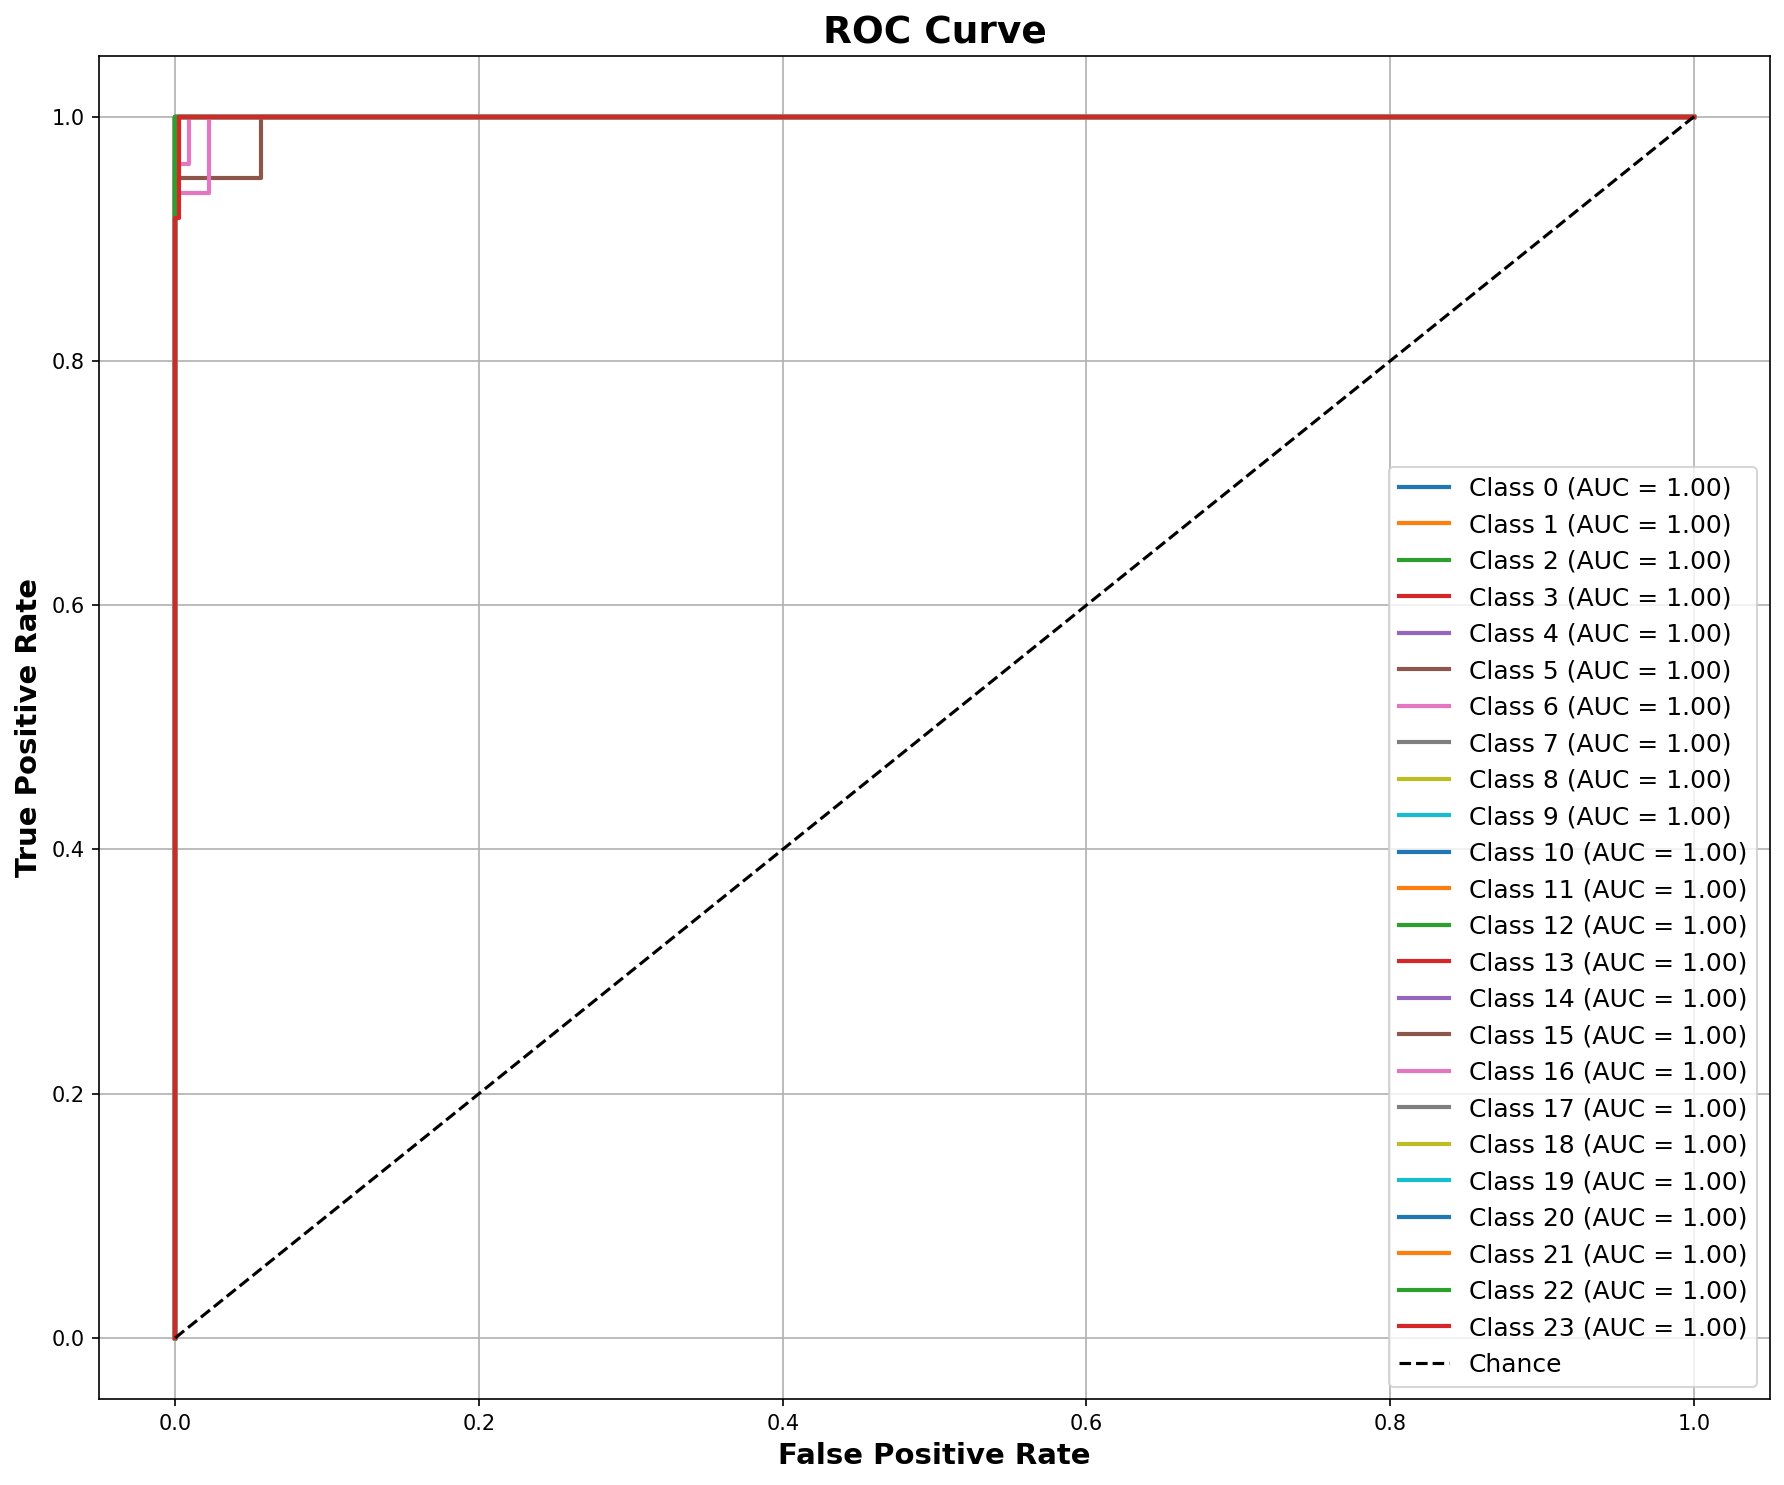

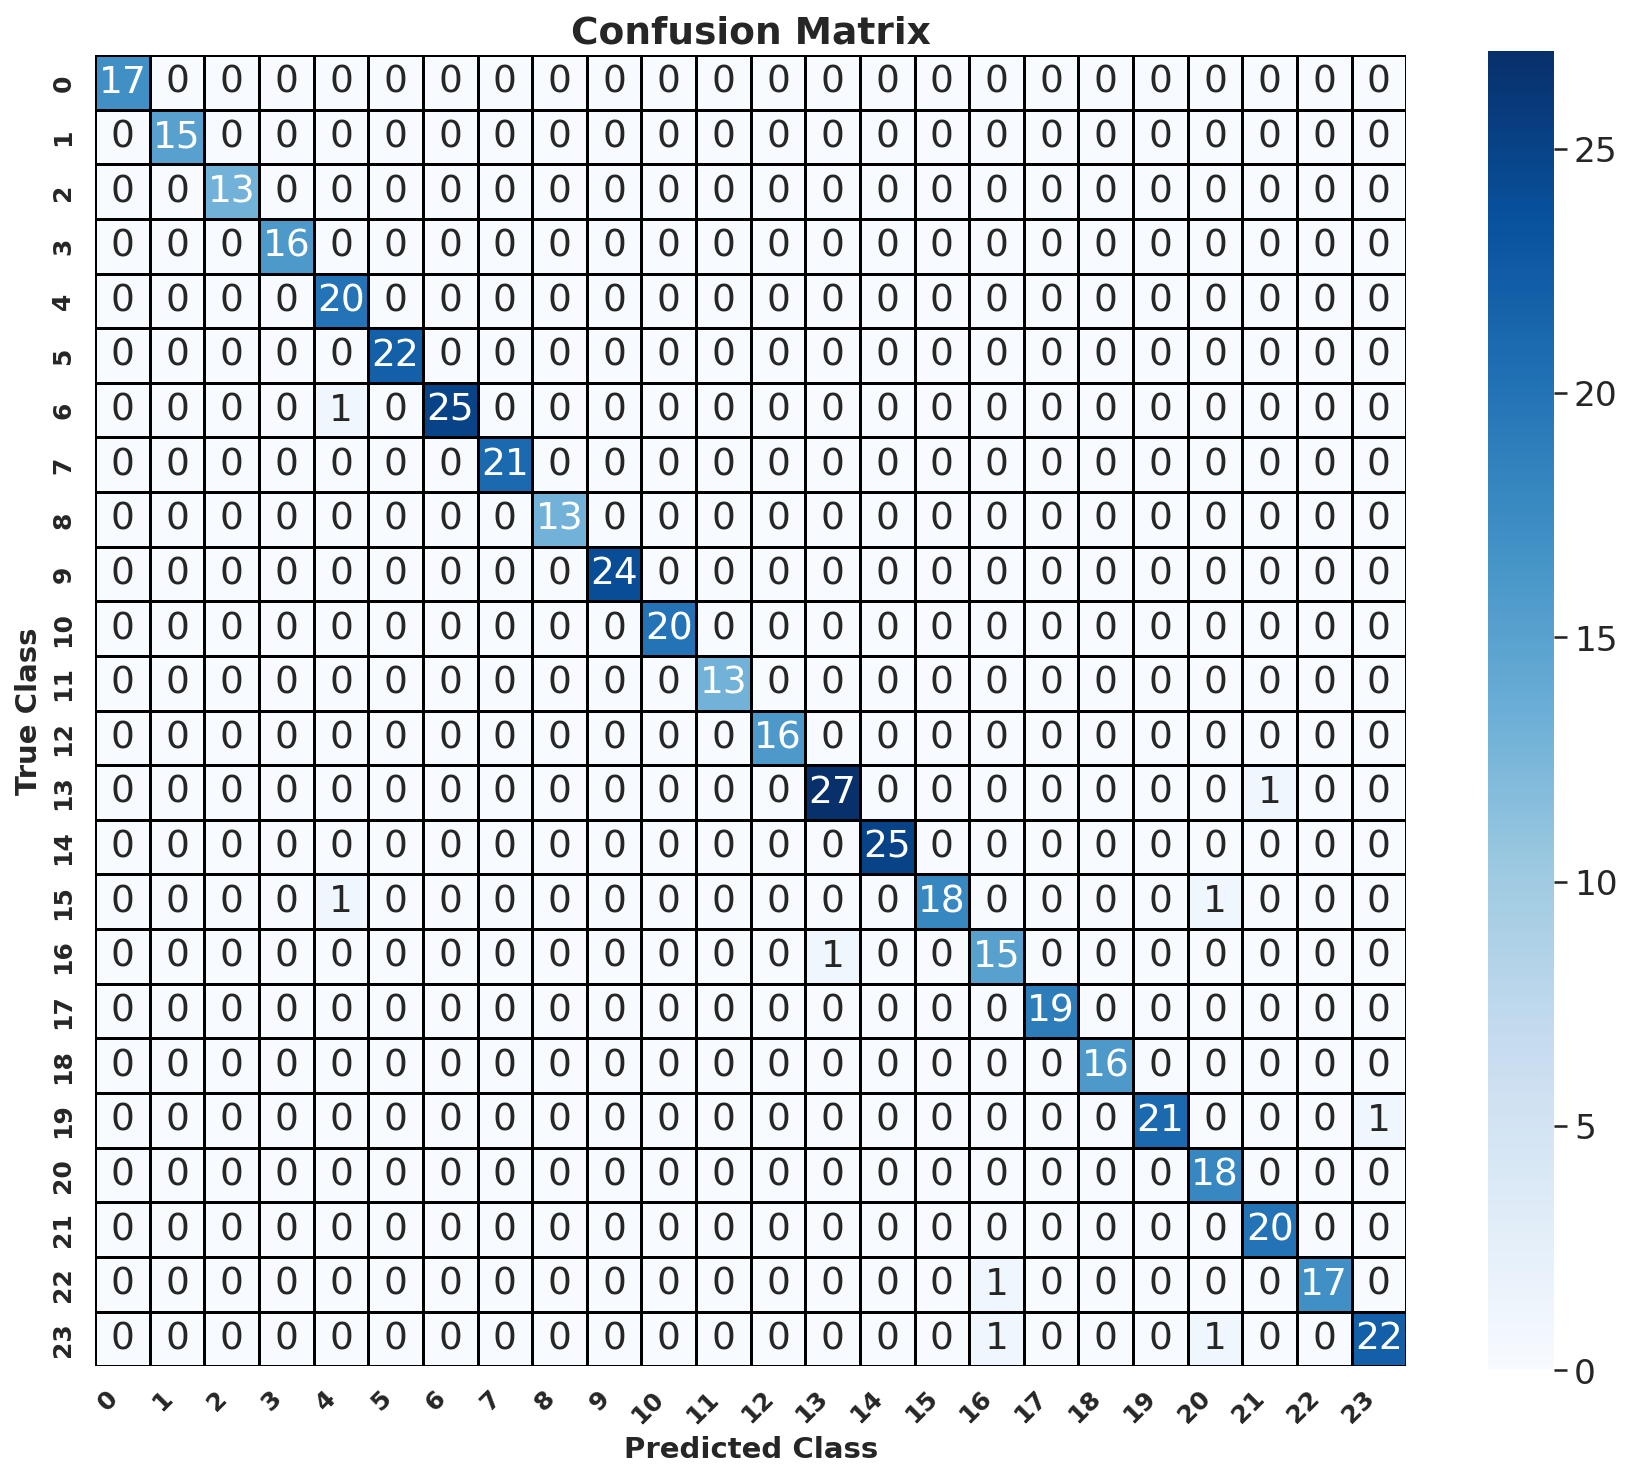

In [ ]:
# Plot ROC-AUC curve for each class
plt.figure(figsize=(12, 10), dpi=150)  # Increase figure size and DPI for higher quality
n_classes = probs.shape[1]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels == i, probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', label='Chance', linestyle='--')
plt.title("ROC Curve", fontsize=18, fontweight='bold')
plt.xlabel("False Positive Rate", fontsize=14, fontweight='bold')
plt.ylabel("True Positive Rate", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save or display the ROC-AUC curve
plt.savefig("roc_auc_curve_high_quality.png", dpi=300)  # Save with high quality (300 dpi)
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(12, 10), dpi=150)  # Increase figure size and DPI for higher quality
sns.set(font_scale=1.5)  # Increase font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=np.arange(n_classes), yticklabels=np.arange(n_classes),
            linewidths=0.5, linecolor='black', square=True)

# Add axis labels and title
plt.title("Confusion Matrix", fontsize=18, fontweight='bold')
plt.xlabel("Predicted Class", fontsize=14, fontweight='bold')
plt.ylabel("True Class", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Save or display the confusion matrix
plt.tight_layout()
plt.savefig("confusion_matrix_high_quality.png", dpi=300)  # Save with high quality (300 dpi)
plt.show()

This code performs the following tasks:

1. **Loading the Model and Tokenizer**:
   - It loads the **BERT tokenizer** (`AutoTokenizer`) from the `"bert-base-uncased"` pre-trained model to prepare the text inputs for BERT.
   - It uses the previously fine-tuned model (`best_model`) to make predictions.

2. **Preparing the Input Data**:
   - It takes a list of **input texts**, which seem to be descriptions of medical symptoms.
   - Each text is **tokenized** (converted into input format that BERT understands) using the tokenizer with padding and truncation to ensure uniform input lengths. A maximum length of 128 tokens is used to limit the size of each input sequence.

3. **Setting Device**:
   - The model is loaded onto either a **GPU** (if available) or **CPU** (if no GPU is available) for computation.
   - The tokenized inputs are moved to the same device (GPU/CPU) to ensure efficient computation.

4. **Inference**:
   - The model performs inference on the tokenized input texts using **`model(**inputs)`**, which produces the logits (raw model outputs).
   - The logits are processed using **softmax** to convert them into probabilities (indicating the model's confidence in each class).
   - **Predicted classes** are obtained by taking the class with the highest probability.

5. **Result Interpretation**:
   - The predicted **class numbers** and corresponding **class labels** are obtained from a label mapping, which associates class indices with human-readable labels.
   - The class probabilities for each text are printed to show how confident the model is about its predictions for each class.
   
6. **Output**:
   - For each input text, the model outputs:
     - The **input text**.
     - The **predicted class number** and its **human-readable label**.
     - The **probabilities** for each class, which show the model's confidence in each possible class for that input.

This approach is useful when you want to interpret the predictions of a trained classifier on individual samples, along with the model's confidence for each possible class. It's particularly helpful in cases where you need to assess whether the model's predictions are reasonable or if there is ambiguity in the predictions (i.e., the model's probabilities for different classes are close to each other).


In [ ]:
from transformers import AutoTokenizer
import torch
import torch.nn.functional as F

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define your input texts
texts = [
    "I'm currently experiencing a high fever, along with red spots and rashes covering my entire body. This has left me feeling extremely fatigued, with a significant loss of appetite, leading to weakness and a general sense of lethargy. I'm quite concerned about my condition.",
    "I've been experiencing skin peeling in several areas, particularly on my knees, elbows, and arms. This peeling is often accompanied by a painful or burning sensation. Additionally, I've noticed small indentations forming on my nails, which is concerning.",
    "I've been having difficulty using the restroom lately. It's been painful when I do go, and I've noticed buttock soreness along with bloody stools "
]

# Tokenize and prepare the inputs
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Move tensors to the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = best_model
model.to(device)
inputs = {key: val.to(device) for key, val in inputs.items()}

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get probabilities and predicted classes
probabilities = F.softmax(outputs.logits, dim=-1).cpu().numpy()
predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()

# Get labels from the dataframe
labels = df['label'].unique()
label_mapping = {i: label for i, label in enumerate(labels)}
label_names = [label_mapping[i] for i in range(len(label_mapping))]

# Print results
for text, prediction, probs in zip(texts, predictions, probabilities):
    print(f"Input: {text}")
    print(f"Predicted Class Number: {prediction}")
    print(f"Predicted Class Label: {label_names[prediction]}")
    print("Class Probabilities:")
    for i, prob in enumerate(probs):
        print(f"  Class {i} ({label_mapping[i]}): {prob:.4f}")
    print()


Input: I'm currently experiencing a high fever, along with red spots and rashes covering my entire body. This has left me feeling extremely fatigued, with a significant loss of appetite, leading to weakness and a general sense of lethargy. I'm quite concerned about my condition.
Predicted Class Number: 4
Predicted Class Label: Impetigo
Class Probabilities:
  Class 0 (Psoriasis): 0.0100
  Class 1 (Varicose Veins): 0.0058
  Class 2 (Typhoid): 0.0081
  Class 3 (Chicken pox): 0.0053
  Class 4 (Impetigo): 0.6089
  Class 5 (Dengue): 0.0046
  Class 6 (Fungal infection): 0.1524
  Class 7 (Common Cold): 0.0043
  Class 8 (Pneumonia): 0.0135
  Class 9 (Dimorphic Hemorrhoids): 0.0055
  Class 10 (Arthritis): 0.0228
  Class 11 (Acne): 0.0093
  Class 12 (Bronchial Asthma): 0.0225
  Class 13 (Hypertension): 0.0039
  Class 14 (Migraine): 0.0095
  Class 15 (Cervical spondylosis): 0.0059
  Class 16 (Jaundice): 0.0509
  Class 17 (Malaria): 0.0116
  Class 18 (urinary tract infection): 0.0044
  Class 19 (al